In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
# import matplotlib as plt
import matplotlib.pyplot as plt
import requests
import json
from dateutil.relativedelta import relativedelta
from datetime import datetime, timedelta



%matplotlib inline

#Day Zero https://www.nytimes.com/2020/03/11/business/media/tom-hanks-coronavirus.html

In [51]:
nyt = pd.read_csv('./Data/NYT_All.csv')

In [52]:
US = nyt.groupby(by = 'date')[['cases','deaths']].sum().sort_values(by='date', ascending=False)
#New cases Per Day
US['cases_day'] = abs(US.cases.diff(periods=-1))
#Epidemiogic curve 14 day avg
US['case_curve'] = US.cases_day.rolling(window=14).mean()

#New cases Per Day
US['deaths_day'] = abs(US.deaths.diff(periods=-1))
#Epidemiogic curve 14 day avg
US['death_curve'] = US.deaths_day.rolling(window=14).mean()

#Explicit Datetime index
US.index = pd.to_datetime(US.index)

Text(0.0, 1.0, 'US Distributions')

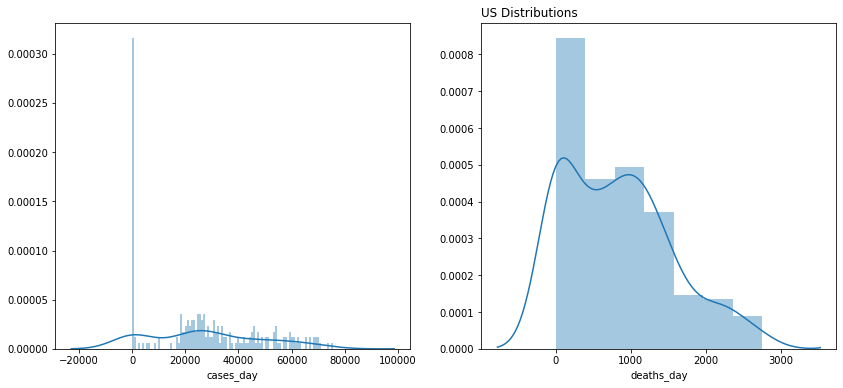

In [53]:
#hist of cases and deaths All US
with plt.rc_context({'xtick.color':'black', 'ytick.color':'black'}):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize = [14,6])
    
    sns.distplot(US['cases_day'],ax=ax1,bins=100)
    sns.distplot(US['deaths_day'], ax=ax2)

plt.title('US Distributions',loc='left')

Text(0.0, 1.0, 'US Distributions')

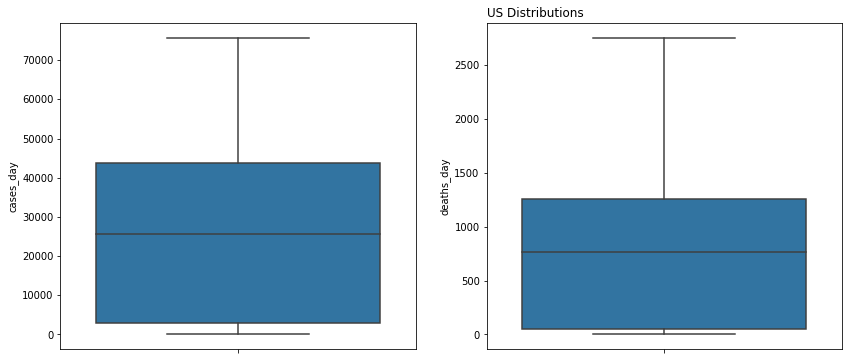

In [54]:

with plt.rc_context({'xtick.color':'black', 'ytick.color':'black'}):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize = [14,6])
    
    sns.boxplot(y='cases_day',data=US,ax=ax1,showfliers=False)
    sns.boxplot(y='deaths_day',data=US,ax=ax2,showfliers=False)

plt.title('US Distributions',loc='left')

''

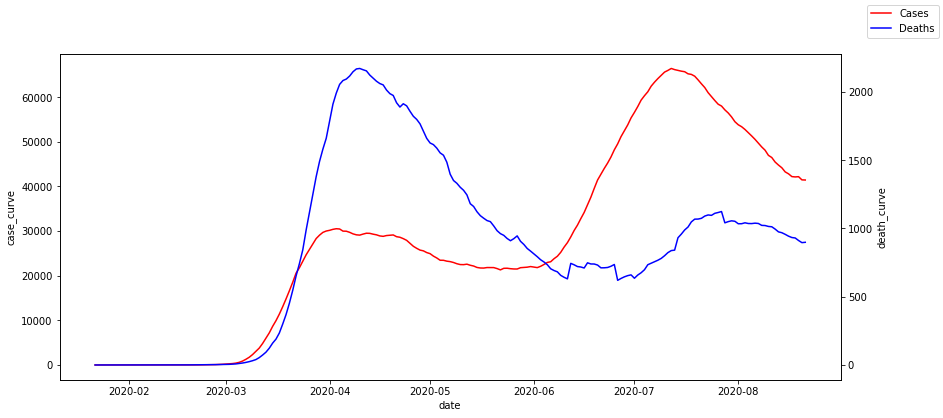

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[14,6])

sns.lineplot(x=US.index, y='case_curve',data=US,ax=ax,color='red')

ax2= ax.twinx()
sns.lineplot(x=US.index, y='death_curve',data=US,
              ax=ax2,color = 'b')

ax.figure.legend(labels= ('Cases','Deaths'))
;

In [59]:
US_case_matrix = pd.pivot_table(US,
                               index=US.index.day,
                               columns = US.index.month,
                               values = 'cases_day')
US_case_matrix.sort_index(level = 0, ascending = False, inplace=True)




US_death_matrix = pd.pivot_table(US,
                               index=US.index.day,
                               columns = US.index.month,
                               values = 'deaths_day')
US_death_matrix.sort_index(level = 0, ascending = False, inplace=True)

# wa_case_matrix.head()

''

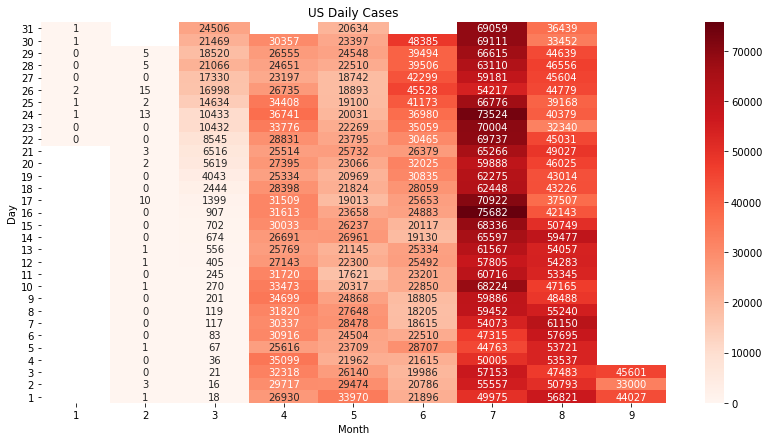

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[14, 7])

sns.heatmap(US_case_matrix,
           annot=True,
           cmap ='Reds',
           fmt='g')
ax.set_xlabel('Month')
ax.set_ylabel('Day')
plt.title('US Daily Cases')
plt.savefig('./US_Daily_Cases.png', dpi=300)
;

''

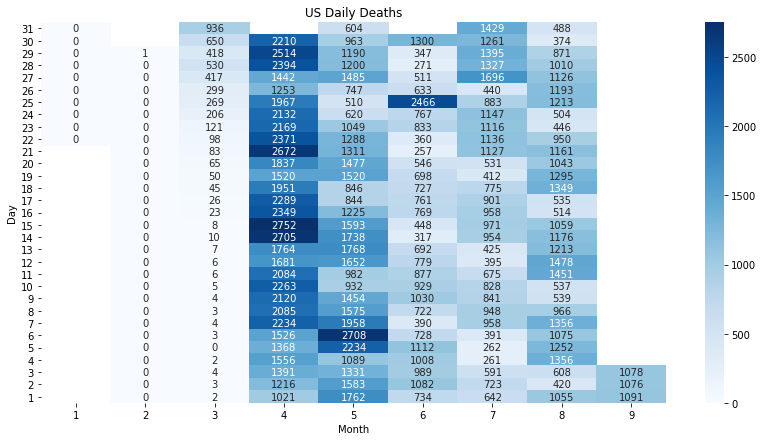

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[14, 7])

sns.heatmap(US_death_matrix,
           annot=True,
           cmap ='Blues',
           fmt='g')
ax.set_xlabel('Month')
ax.set_ylabel('Day')
plt.title('US Daily Deaths')
plt.savefig('./US_Daily_Deaths.png', dpi=300)
;

In [10]:
ctp = pd.read_csv('https://covidtracking.com/api/v1/states/daily.csv',parse_dates=['date'])
ctp = ctp[['date','state','positive','negative','death']]


ctp = pd.pivot_table(ctp,
                  index='date',
                  columns='state',
                  values = 'positive')
ctp.sort_index(level=0,ascending=False,inplace=True)
d=datetime.today() - relativedelta(days=30)
ctp = ctp.loc[ctp.index>=d]

ctp = ctp.diff().abs()
ctp.head()


state,AK,AL,AR,AS,AZ,CA,CO,CT,DC,DE,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
date,,,,,,,,,,,,,,,,,,,,,
2020-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,73.0,623.0,615.0,0.0,519.0,4255.0,351.0,102.0,28.0,14.0,...,1502.0,4334.0,419.0,927.0,4.0,2.0,304.0,578.0,135.0,45.0
2020-08-31,35.0,1558.0,273.0,0.0,507.0,3712.0,201.0,127.0,57.0,106.0,...,1396.0,4364.0,296.0,1021.0,5.0,11.0,315.0,1036.0,257.0,24.0
2020-08-30,39.0,823.0,368.0,0.0,174.0,4176.0,182.0,384.0,33.0,86.0,...,1818.0,2615.0,253.0,847.0,5.0,8.0,0.0,268.0,140.0,22.0
2020-08-29,51.0,1346.0,478.0,0.0,374.0,6070.0,268.0,0.0,34.0,6.0,...,835.0,3824.0,448.0,938.0,11.0,11.0,1019.0,570.0,143.0,36.0
